In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        # TODO
        MinMaxScaler(),
        PCA(2)        
    )
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 2)
    return X2


def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        # TODO
        KMeans(n_clusters=10)
    )
    model.fit(X)
    return model.predict(X)

cluster          0   1   2   3   4   5   6   7   8   9
city                                                  
Anchorage       12   0   1   0  19   0   1   7  16   0
Atlanta          0   0   0   0   0   0   0   0   0  47
Atlantic City    0  31   0   0   0   0   0   0   0  14
Calgary          9   2   0   0   0   0  40   1   0   0
Chicago          0   3   0   0   0   0  47   1   0   1
Denver           0   2   0   0   0   0   1   0   0   6
Edmonton        24   0   0   0   3   0   4  18   2   0
Gander           2   0   9   0   7   0   4  14  15   0
Halifax          0   0   0   0   0   0  40  10   0   0
London           2   0   0   0   0   0  39   1   0   0
Los Angeles      0   0   0   0   0  39   0   0   0   0
Miami            0   0   0  43   0   0   0   0   0   0
Montreal         2   0   1   0   2   0   1  15   7   0
New Orleans      0   0   0  43   0   0   0   0   0   2
Ottawa          15   0   2   0   3   0   7  18   6   0
Portland         0  35   0   0   0   0   0   0   0   3
Québec    

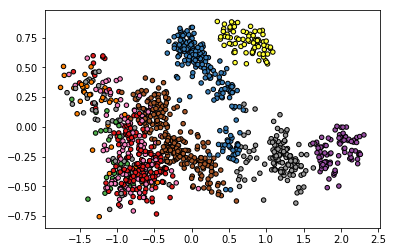

In [4]:
def main():
    #data = pd.read_csv(sys.argv[1])
    data = pd.read_csv('monthly-data-labelled.csv')
   
    
    X = data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]]
    # Yes,this is a stupid way after my friends told me I dont need to select the column if i could just remove year and city
    y = data['city']
    
    X2 = get_pca(X)
    clusters = get_clusters(X)
    plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=20)
    plt.savefig('clusters.png')

    df = pd.DataFrame({
        'cluster': clusters,
        'city': y,
    })
    counts = pd.crosstab(df['city'], df['cluster'])
    print(counts)


if __name__ == '__main__':
    main()